In [2]:
import pandas as pd
import numpy as np
import librosa 
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os
import csv
import soundfile
import sklearn
from matplotlib.colors import Normalize
import glob
from scipy.stats import kurtosis, skew

In [3]:
path = os.chdir('C:/Users/makye/OneDrive/Documents/Career/BeCode/study/Data_preprocessing/audioProcessing/valve')
print(os.getcwd())


C:\Users\makye\OneDrive\Documents\Career\BeCode\study\Data_preprocessing\audioProcessing\valve


In [4]:
#Individual functions for targeted features
# file= ('0_dB_slider/slider/id_00/abnormal/00000000.wav')

def getfeature(file):
    
    wave , sr = librosa.load(file)
    
    chroma= librosa.feature.chroma_stft(y=wave, sr=sr)
    chroma_stft = (np.mean(chroma), np.amin(chroma), np.amax(chroma), np.std(chroma), 
                   np.median(chroma))
    
    mel = librosa.feature.melspectrogram(y=wave, sr=sr)
    mel_spec = (np.mean(mel), np.amin(mel), np.amax(mel), np.std(mel), 
                   np.median(mel))
    
    
    rmse = librosa.feature.rms(y=wave)
    rms_f = (np.mean(rmse), np.amin(rmse), np.amax(rmse), np.std(rmse), 
                   np.median(rmse))
    
    spec = librosa.feature.spectral_centroid(y=wave, sr=sr)
    spec_cent = (np.mean(spec), np.amin(spec), np.amax( spec), np.std(spec), 
                   np.median(spec))
    
    
    specb = librosa.feature.spectral_bandwidth(y=wave, sr=sr)
    spec_bw = (np.mean(specb), np.amin(specb), np.amax( specb), np.std(specb), 
                   np.median(specb))
    
    roll = librosa.feature.spectral_rolloff(y=wave, sr=sr)
    rolloff = (np.mean(roll), np.amin(roll), np.amax(roll), np.std(roll), 
                   np.median(roll))
    
    
    zcr = librosa.feature.zero_crossing_rate(wave)
    zcrf = (np.mean(zcr), np.amin(zcr), np.amax(zcr), np.std(zcr), 
                   np.median(zcr))
    
    mfcc_mean  = np.mean(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0)
    mfcc_min  = np.amin(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0)
    mfcc_max  = np.amax(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    mfcc_std  = np.std(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    mfcc_med = np.median(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    
    list_features = (chroma_stft, mel_spec, rms_f, spec_cent, spec_bw, rolloff, zcrf,  
                     mfcc_mean,  mfcc_min,  mfcc_max,  mfcc_std,  mfcc_med)
    
    feature_matrix=np.array([])
    # use np.hstack to stack our feature arrays horizontally to create a feature matrix
    feature_matrix = np.hstack((list_features))

    return feature_matrix
    

In [5]:
#load our entire dataset and compute the features of each audio file

def load_data():
    
    X,y=[],[]
    
    count = 0
    holder = ['normal', 'abnormal']
    for i in holder:
        v = f'*_dB_valve/valve/id_*/{i}/*.wav'
        if i == 'normal':
            target = 0
        else:
            target = 1
            
    
        for file in glob.glob(v):
            file_name=os.path.basename(file)
            features = getfeature(file)
            X.append(features)
            y.append(target)
            count += 1
            
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{4205} audio samples',end=' ')
        
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)


In [6]:
features, target = load_data()

 Processed 12510/4205 audio samples 

In [7]:

print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) 
features_df


Audio samples represented: 12510
Numerical features extracted per sample: 235


,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,0.602637,0.071476,1.0,0.227774,0.585758,0.015487,2.874560e-17,2.716805,0.050567,0.002475,...,1.301033,-0.551907,2.522632,-2.773360,2.369489,-4.333429,4.333409,-2.504099,-0.896134,-2.060452
1,0.645485,0.137317,1.0,0.210833,0.636642,0.020151,8.402055e-17,3.466863,0.085929,0.000769,...,0.898998,-2.018135,2.676596,-2.036510,3.798639,-2.704311,2.842574,-2.270307,0.777605,-0.973281
2,0.240859,0.005469,1.0,0.268919,0.146407,0.016171,6.709157e-17,3.377365,0.077094,0.000618,...,0.708288,-10.786222,-8.318110,-6.055274,7.495485,1.350507,6.750520,-5.181309,-4.851731,-8.183991
3,0.614015,0.124540,1.0,0.219609,0.589665,0.021118,9.043221e-17,1.636918,0.072139,0.001278,...,-0.721104,-2.463306,2.576881,-2.280949,3.937058,-4.021860,0.978857,-2.698501,0.857604,-0.175833
4,0.338163,0.011525,1.0,0.296418,0.214562,0.016868,7.645408e-17,1.486315,0.062026,0.000514,...,-10.224876,-4.618228,9.431211,4.624210,6.807269,-6.304316,-3.367886,-7.888888,4.424124,1.800391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,0.480917,0.051443,1.0,0.272797,0.427906,0.002343,4.672766e-18,0.783690,0.015455,0.000058,...,-0.647994,-1.618798,3.554687,-1.941166,1.533727,-3.664468,4.655882,-2.008286,0.728686,0.741715
12506,0.577043,0.043479,1.0,0.231606,0.548817,0.002291,5.632966e-18,0.777710,0.015521,0.000065,...,2.193210,-1.913835,1.741258,-2.890882,1.032992,-4.025675,3.648837,-1.286240,1.761818,0.029012
12507,0.368881,0.021967,1.0,0.290915,0.257171,0.001931,5.017236e-18,0.741821,0.014641,0.000052,...,1.610114,5.835861,4.305128,-7.066517,-4.671091,-9.005202,2.159684,1.709826,5.982321,-0.461442
12508,0.530236,0.077034,1.0,0.252093,0.479229,0.002478,6.601193e-18,0.873654,0.015781,0.000088,...,-2.330652,-3.307174,0.035680,-4.453303,0.858348,-5.692404,1.253912,-1.912903,0.841498,-0.169960


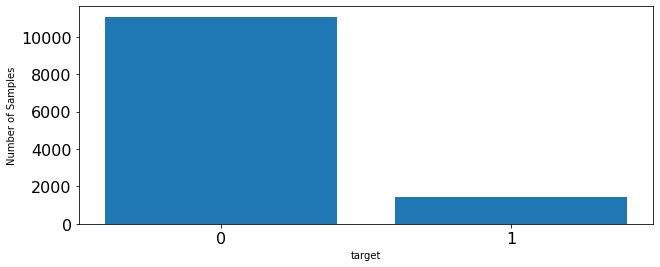

In [8]:
#Imbalances in the target dataset

# plot target
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)

#np.unique returns ordered list of unique elements and count of each element
target_list, count = np.unique(target, return_counts=True)
plt.bar(x=range(2), height=count)
plt.xticks(ticks=range(2), labels = [target for target in target_list],fontsize=10)
plt.xlabel('target')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

In [9]:
# Adding target to features dataframe
features_df['target'] = target.tolist()

features_df

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,target
0,0.602637,0.071476,1.0,0.227774,0.585758,0.015487,2.874560e-17,2.716805,0.050567,0.002475,...,-0.551907,2.522632,-2.773360,2.369489,-4.333429,4.333409,-2.504099,-0.896134,-2.060452,0
1,0.645485,0.137317,1.0,0.210833,0.636642,0.020151,8.402055e-17,3.466863,0.085929,0.000769,...,-2.018135,2.676596,-2.036510,3.798639,-2.704311,2.842574,-2.270307,0.777605,-0.973281,0
2,0.240859,0.005469,1.0,0.268919,0.146407,0.016171,6.709157e-17,3.377365,0.077094,0.000618,...,-10.786222,-8.318110,-6.055274,7.495485,1.350507,6.750520,-5.181309,-4.851731,-8.183991,0
3,0.614015,0.124540,1.0,0.219609,0.589665,0.021118,9.043221e-17,1.636918,0.072139,0.001278,...,-2.463306,2.576881,-2.280949,3.937058,-4.021860,0.978857,-2.698501,0.857604,-0.175833,0
4,0.338163,0.011525,1.0,0.296418,0.214562,0.016868,7.645408e-17,1.486315,0.062026,0.000514,...,-4.618228,9.431211,4.624210,6.807269,-6.304316,-3.367886,-7.888888,4.424124,1.800391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,0.480917,0.051443,1.0,0.272797,0.427906,0.002343,4.672766e-18,0.783690,0.015455,0.000058,...,-1.618798,3.554687,-1.941166,1.533727,-3.664468,4.655882,-2.008286,0.728686,0.741715,1
12506,0.577043,0.043479,1.0,0.231606,0.548817,0.002291,5.632966e-18,0.777710,0.015521,0.000065,...,-1.913835,1.741258,-2.890882,1.032992,-4.025675,3.648837,-1.286240,1.761818,0.029012,1
12507,0.368881,0.021967,1.0,0.290915,0.257171,0.001931,5.017236e-18,0.741821,0.014641,0.000052,...,5.835861,4.305128,-7.066517,-4.671091,-9.005202,2.159684,1.709826,5.982321,-0.461442,1
12508,0.530236,0.077034,1.0,0.252093,0.479229,0.002478,6.601193e-18,0.873654,0.015781,0.000088,...,-3.307174,0.035680,-4.453303,0.858348,-5.692404,1.253912,-1.912903,0.841498,-0.169960,1


In [10]:
#CSV dataFrame

def createCsv(df):
    

    df.to_csv('martin_valve40.csv', index=False)
    
createCsv(features_df)